In [23]:
import pandas as pd
import numpy as np
import quandl, math
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

quandl.ApiConfig.api_key = "uQ6Xym8SgcypPhVHsnoF"
df = quandl.get('WIKI/GOOGL')

df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [24]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.343693,0.130884,1990515.0
2018-03-22,1053.150000,2.921711,-2.487014,3418154.0
2018-03-23,1026.550000,3.918952,-2.360729,2413517.0


In [25]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,214.005615
2004-08-20,54.322689,0.710922,7.227007,22834300.0,210.725489
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,1.886792,1.183658,9188600.0,223.309335


In [26]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
y = np.array(df['label'])
print(X)

[[-1.57627789  2.24965149  0.22714733  4.29480253]
 [-1.55512222 -0.33929392  4.68260107  1.70252919]
 [-1.55223073  2.26420234 -0.77525789  1.15874413]
 ...
 [ 2.452217   -0.52120596  0.8182142  -0.79953667]
 [ 2.41841953 -0.2972299   0.3200773  -0.6416296 ]
 [ 2.28460484  2.33821857 -2.35035768 -0.30773557]]


In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                     test_size=0.2)

clf = svm.SVR()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.6983031076800025


In [28]:
clf2 = LinearRegression()
clf2.fit(X_train, y_train)
confidence2 = clf2.score(X_test, y_test)
print(confidence2)

0.8840049160164016


In [29]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

X = np.array(df.drop(['label'], 1))

X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'][:-forecast_out])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf3 = LinearRegression(n_jobs=-1)
clf3.fit(X_train, y_train)
confidence3 = clf3.score(X_test, y_test)
print(confidence3)

0.5514858137258893


In [31]:
forecast_set = clf3.predict(X_lately)
print(forecast_set)
print(confidence3)
print(forecast_out)

[643.10091287 641.55280249 642.89300113 638.2418644  631.91294811
 638.51516151 642.95008849 642.95677819 640.49415125 639.09413231
 633.85030862 635.56395529 628.94245174 622.5128145  630.47214178
 638.86106646 633.4317269  634.13150769 624.80172524 613.9120286
 613.359439   608.81184067 590.12499206 599.53877521 597.72780215
 608.1428407  603.47160084 616.72800535 594.90027989 582.2702926
 599.07119935 601.68845324 592.52801598 583.41087193 589.83125092
 585.49539492 598.02439224 582.17748582 579.19740597 589.21027926
 580.10827844 577.4655634  568.74467231 561.81583422 581.2902274
 574.90423412 580.18276659 577.72708977 578.08192733 569.55394734
 560.77567492 568.98057918 570.4455491  580.27639982 582.73913294
 578.03446712 571.64475156 569.8399824  582.34677374 583.58834572
 590.65208045 595.3749387  601.77069725 611.86275584 610.42173772
 607.58502075 607.27432489 603.37540738 595.34622163 596.20508502
 604.14545257 603.2224832  609.03325656 607.16802722 605.968394
 599.68506325 5

In [32]:
style.use('ggplot')
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
print(next_unix)

1436227200.0


In [33]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

Text(0, 0.5, 'Price')

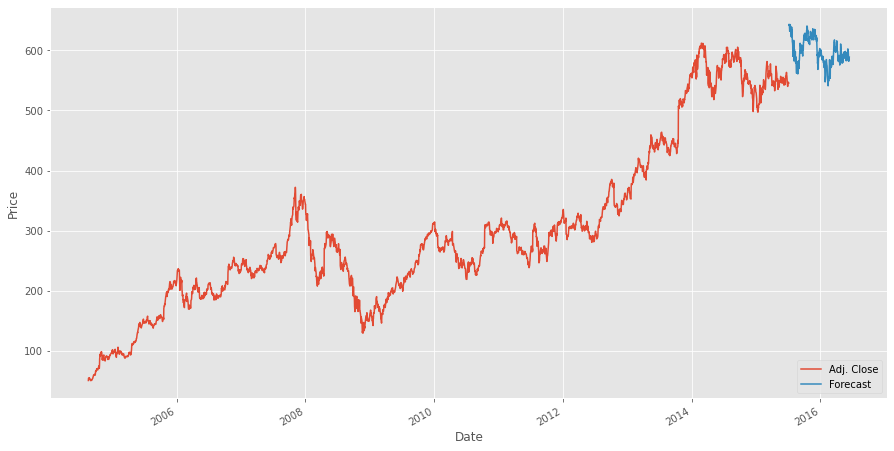

In [36]:
plt.figure(figsize=(15,8))
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
#plt.show()